# PSM on GI Bleed Cohort

## Imports

In [66]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd

## Data Prep

In [67]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K70_Cohort/albumin_cleaned_for_psm.csv')

In [68]:
df.shape

(67149, 15)

In [69]:
df.albumin_24hrs.value_counts()

0    60505
1     6644
Name: albumin_24hrs, dtype: int64

In [70]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [71]:
df.head()

personid                           encounterid  \
0  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
1  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
2  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
3  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
4  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   8.240278                 0                 1.0                  81   
1    1   5.698611                 0                 0.0                  85   
2    0  13.857639                 0                 0.0                  77   
3    0   5.127778                 0                 0.0                  27   
4    0  12.054167                 0                 0.0                  78   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
0          1    4      1  11.000             0.0     0        1              0  
1          1    4      0  18.518             0.0     0        1              0  
2          1    2      1  22.000             2.0     2        1              1  
3          1    3      0  16.574             1.0     0        1              1  
4          1   10      0  18.000             1.0     0        1              1

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67149 entries, 0 to 67148
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   personid            67149 non-null  object 
 1   encounterid         67149 non-null  object 
 2   ICU                 67149 non-null  int64  
 3   LOS_days            67149 non-null  float64
 4   90_day_mortality    67149 non-null  int64  
 5   90_day_readmission  67149 non-null  float64
 6   hospital_free_days  67149 non-null  int64  
 7   Cirrhosis           67149 non-null  int64  
 8   CCI                 67149 non-null  int64  
 9   qSOFA               67149 non-null  int64  
 10  MELD                67149 non-null  float64
 11  albumin_timing      67149 non-null  float64
 12  SEWS                67149 non-null  int64  
 13  albumin             67149 non-null  int64  
 14  albumin_24hrs       67149 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 7.7+

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [73]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    6644.000000
mean        8.346971
std         8.023175
min         0.080556
25%         2.964583
50%         5.893750
75%        11.168006
max        54.840972
Name: LOS_days, dtype: float64

In [74]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    60505.000000
mean         5.571027
std          6.802142
min          0.000000
25%          1.415278
50%          3.392361
75%          6.882801
max         54.989583
Name: LOS_days, dtype: float64

In [75]:
df[df['albumin_24hrs'] == 1]['90_day_mortality'].value_counts()

0    4912
1    1732
Name: 90_day_mortality, dtype: int64

In [76]:
print((1732/(1732+4912)) * 100)

26.068633353401566


In [77]:
df[df['albumin_24hrs'] == 0]['90_day_mortality'].value_counts()

0    55711
1     4794
Name: 90_day_mortality, dtype: int64

In [78]:
print((4794/(4794+55711)) * 100)

7.9233121229650445


In [79]:
df[df['albumin_24hrs'] == 1]['90_day_readmission'].value_counts()

0.0    4546
1.0    2098
Name: 90_day_readmission, dtype: int64

In [80]:
print((2098/(2098+4546)) * 100)

31.577363034316676


In [81]:
df[df['albumin_24hrs'] == 0]['90_day_readmission'].value_counts()

0.0    39141
1.0    21364
Name: 90_day_readmission, dtype: int64

In [82]:
print((21364/(21364 + 39141)) * 100)

35.30947855549128


In [83]:
df.head()

personid                           encounterid  \
0  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
1  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
2  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
3  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
4  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   8.240278                 0                 1.0                  81   
1    1   5.698611                 0                 0.0                  85   
2    0  13.857639                 0                 0.0                  77   
3    0   5.127778                 0                 0.0                  27   
4    0  12.054167                 0                 0.0                  78   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
0          1    4      1  11.000             0.0     0        1              0  
1          1    4      0  18.518             0.0     0        1              0  
2          1    2      1  22.000             2.0     2        1              1  
3          1    3      0  16.574             1.0     0        1              1  
4          1   10      0  18.000             1.0     0        1              1

In [84]:
# df.drop(columns=['90_day_mortality'], inplace=True)

In [85]:
df.head()

personid                           encounterid  \
0  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
1  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
2  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
3  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
4  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   8.240278                 0                 1.0                  81   
1    1   5.698611                 0                 0.0                  85   
2    0  13.857639                 0                 0.0                  77   
3    0   5.127778                 0                 0.0                  27   
4    0  12.054167                 0                 0.0                  78   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
0          1    4      1  11.000             0.0     0        1              0  
1          1    4      0  18.518             0.0     0        1              0  
2          1    2      1  22.000             2.0     2        1              1  
3          1    3      0  16.574             1.0     0        1              1  
4          1   10      0  18.000             1.0     0        1              1

In [86]:
df_a24 = df[['personid', 'encounterid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'albumin_timing', 'albumin']]

In [87]:
df_a24.head()

personid                           encounterid  \
0  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
1  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
2  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
3  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
4  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

    LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0   8.240278                 0                 1.0                  81   
1   5.698611                 0                 0.0                  85   
2  13.857639                 0                 0.0                  77   
3   5.127778                 0                 0.0                  27   
4  12.054167                 0                 0.0                  78   

   albumin_timing  albumin  
0             0.0        1  
1             0.0        1  
2             2.0        1  
3             1.0        1  
4             1.0        1

In [9]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [88]:
df.shape

(67149, 15)

In [89]:
df.head()

personid                           encounterid  \
0  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
1  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
2  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
3  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
4  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   ICU   LOS_days  90_day_mortality  90_day_readmission  hospital_free_days  \
0    0   8.240278                 0                 1.0                  81   
1    1   5.698611                 0                 0.0                  85   
2    0  13.857639                 0                 0.0                  77   
3    0   5.127778                 0                 0.0                  27   
4    0  12.054167                 0                 0.0                  78   

   Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  albumin  albumin_24hrs  
0          1    4      1  11.000             0.0     0        1              0  
1          1    4      0  18.518             0.0     0        1              0  
2          1    2      1  22.000             2.0     2        1              1  
3          1    3      0  16.574             1.0     0        1              1  
4          1   10      0  18.000             1.0     0        1              1

## Initialize PsmPy Class

In [92]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['personid', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'albumin_timing', 'albumin'])

In [93]:
%%time
psm.logistic_ps(balance = True)

Wall time: 1min 18s


In [94]:
df_psm = psm.predicted_data

In [95]:
df_psm.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA    MELD  \
0  07ea020e-dbef-418c-b4b2-be3d104ba6be    0          1    2      1  22.000   
1  03255b92-d10f-41fd-8387-9e223f9be912    0          1    3      0  16.574   
2  1dc64909-cbe3-46e2-94ae-7c6de6a38364    0          1   10      0  18.000   
3  47905ac2-9758-4da5-adc5-1349c4c232a9    0          1    2      0  18.000   
4  f0f847d0-a8c0-4d11-b500-110f6f495f1b    0          1    6      0   8.000   

   SEWS  propensity_score  propensity_logit  albumin_24hrs  
0     2          0.635804          0.557197              1  
1     0          0.390010         -0.447270              1  
2     0          0.591606          0.370610              1  
3     0          0.401814         -0.397912              1  
4     0          0.262973         -1.030574              1

## Plot the propensity score / propensity logits

In [96]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 5h 43min 17s


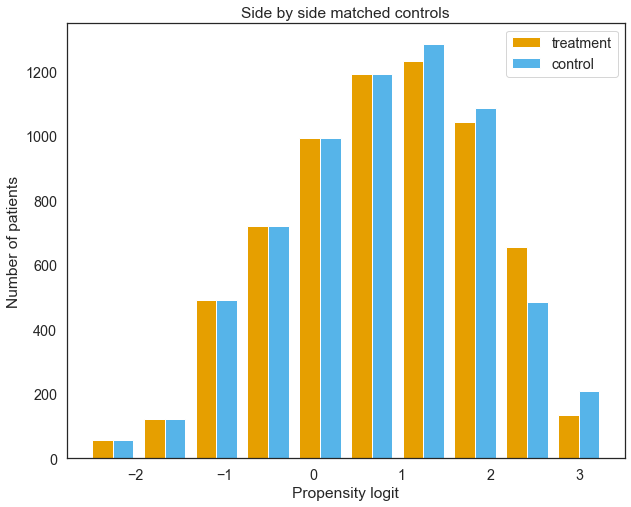

In [97]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

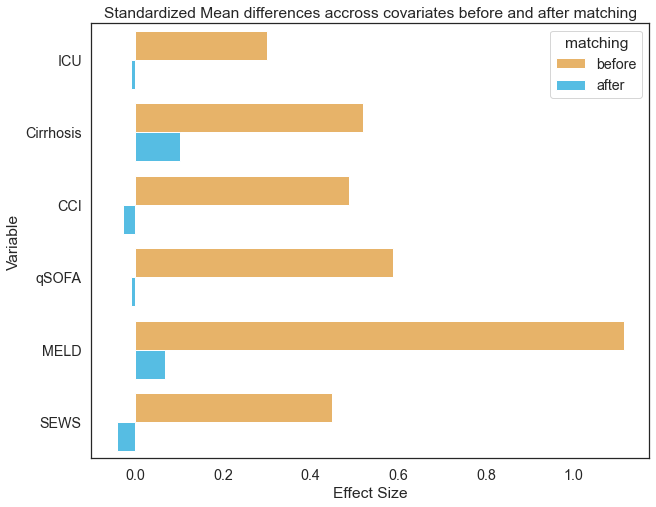

In [98]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [99]:
matched_df = psm.df_matched

In [100]:
matched_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA    MELD  \
0  07ea020e-dbef-418c-b4b2-be3d104ba6be    0          1    2      1  22.000   
1  03255b92-d10f-41fd-8387-9e223f9be912    0          1    3      0  16.574   
2  1dc64909-cbe3-46e2-94ae-7c6de6a38364    0          1   10      0  18.000   
3  47905ac2-9758-4da5-adc5-1349c4c232a9    0          1    2      0  18.000   
4  f0f847d0-a8c0-4d11-b500-110f6f495f1b    0          1    6      0   8.000   

   SEWS  propensity_score  propensity_logit  albumin_24hrs  
0     2          0.635804          0.557197              1  
1     0          0.390010         -0.447270              1  
2     0          0.591606          0.370610              1  
3     0          0.401814         -0.397912              1  
4     0          0.262973         -1.030574              1

In [101]:
matched_df.shape

(13288, 10)

## Matched Ids

In [102]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  07ea020e-dbef-418c-b4b2-be3d104ba6be  ff31b526-18f0-4572-8fd1-d3b165b1ed7f
1  03255b92-d10f-41fd-8387-9e223f9be912  f37fe04a-60a7-4834-a96f-14f0d5bca5a8
2  1dc64909-cbe3-46e2-94ae-7c6de6a38364  84084f06-be58-4528-9006-e158a234de37
3  47905ac2-9758-4da5-adc5-1349c4c232a9  52bbd332-bb92-4e2c-b078-44721c237667
4  f0f847d0-a8c0-4d11-b500-110f6f495f1b  fec2b76f-fa78-41d1-91e9-e8807819d68d

## Effect sizes per variables

In [103]:
psm.effect_size

Variable matching  Effect Size
0         ICU   before     0.301368
1         ICU    after    -0.009126
2   Cirrhosis   before     0.518784
3   Cirrhosis    after     0.101620
4         CCI   before     0.487784
5         CCI    after    -0.029270
6       qSOFA   before     0.587705
7       qSOFA    after    -0.010709
8        MELD   before     1.115367
9        MELD    after     0.068487
10       SEWS   before     0.448247
11       SEWS    after    -0.042827

## Explore Matched df

In [104]:
matched_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA    MELD  \
0  07ea020e-dbef-418c-b4b2-be3d104ba6be    0          1    2      1  22.000   
1  03255b92-d10f-41fd-8387-9e223f9be912    0          1    3      0  16.574   
2  1dc64909-cbe3-46e2-94ae-7c6de6a38364    0          1   10      0  18.000   
3  47905ac2-9758-4da5-adc5-1349c4c232a9    0          1    2      0  18.000   
4  f0f847d0-a8c0-4d11-b500-110f6f495f1b    0          1    6      0   8.000   

   SEWS  propensity_score  propensity_logit  albumin_24hrs  
0     2          0.635804          0.557197              1  
1     0          0.390010         -0.447270              1  
2     0          0.591606          0.370610              1  
3     0          0.401814         -0.397912              1  
4     0          0.262973         -1.030574              1

In [105]:
matched_df.albumin_24hrs.value_counts()

1    6644
0    6644
Name: albumin_24hrs, dtype: int64

In [106]:
matched_df.shape

(13288, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [107]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [108]:
f_df.shape

(13288, 17)

In [109]:
f_df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA    MELD  \
0  07ea020e-dbef-418c-b4b2-be3d104ba6be    0          1    2      1  22.000   
1  03255b92-d10f-41fd-8387-9e223f9be912    0          1    3      0  16.574   
2  1dc64909-cbe3-46e2-94ae-7c6de6a38364    0          1   10      0  18.000   
3  47905ac2-9758-4da5-adc5-1349c4c232a9    0          1    2      0  18.000   
4  f0f847d0-a8c0-4d11-b500-110f6f495f1b    0          1    6      0   8.000   

   SEWS  propensity_score  propensity_logit  albumin_24hrs  \
0     2          0.635804          0.557197              1   
1     0          0.390010         -0.447270              1   
2     0          0.591606          0.370610              1   
3     0          0.401814         -0.397912              1   
4     0          0.262973         -1.030574              1   

                               personid   LOS_days  90_day_mortality  \
0  0b195e78-8b4c-4885-a6f1-162738405bf4  13.857639                 0   
1  0c08fc94-32eb-4e48-bd22-f075f911f7cb   5.127778                 0   
2  0d35b91a-883d-43cb-ad15-31123a3008c8  12.054167                 0   
3  14a7cf74-4469-4102-aac3-cdf906baa891   0.278912                 0   
4  16e21cc6-4d8c-44b1-b5e6-206c5f466893   0.307639                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 0.0                  77             2.0        1  
1                 0.0                  27             1.0        1  
2                 0.0                  78             1.0        1  
3                 0.0                  89             1.0        1  
4                 1.0                   1             1.0        1

In [111]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K70_Cohort/K70_matched.csv', index=False)